# Reconhecimento Facial

### Realizando o imports das biblioteca para reconhecimento facial
#### Utilizaremos a biblioteca do python face_regonition para reconhecer e manipular rostos, em sua base, ela foi construída usando dlib e técnicas de deep learning.
#### face_recognition: https://github.com/ageitgey/face_recognition

In [1]:
from PIL import Image #manipulação de imagens
from pathlib import Path #path diretórios do projeto
import face_recognition #reconhecimento facial
import cv2 #manipulação e transformação de imagens em arrays

In [2]:
print("Face Recognition = " + face_recognition.__version__)
print("Pillow = " + Image.__version__)
print("OpenCV = " + cv2.__version__)

Face Recognition = 1.2.3
Pillow = 7.0.0
OpenCV = 4.5.5


### Carregando imagens ao projeto
#### Base de dados -> [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)
#### Labeled Faces in the Wild é uma base de dados pública criada para ajudar a comunidade nas pesquisas, avanços e criação de projetos de detecção facial. A base contém rostos de diversos famosos e celebridades para realizar treinamento e testes de reconhecimento facial.

#### Carregando a imagem

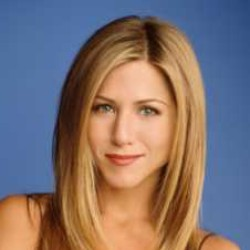

In [3]:
image_name = "Jennifer_Aniston_0016.jpg"
path = Path().resolve()
image = Image.open(f"{path}/images/{image_name}")
display(image)

#### Convertendo a imagem para grayscale (escala de cinza)

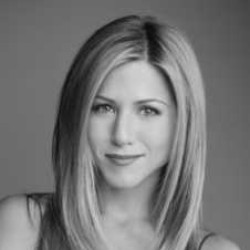

In [4]:
image_gray = image.convert("L")
display(image_gray)

In [5]:
image_gray.save(f"{path}/outputs/{image_name}")

### Detectando features faciais da imagem 

In [6]:
image = face_recognition.load_image_file(f"{path}/outputs/{image_name}")
face_landmarks_list = face_recognition.face_landmarks(image)

#### Pontos de features detectados no rosto

#### Funciona como um array de "coordenadas" dos 68 pontos de detecção facial

In [7]:
face_landmarks_list

[{'chin': [(81, 109),
   (80, 121),
   (80, 133),
   (82, 145),
   (86, 157),
   (93, 168),
   (102, 177),
   (111, 186),
   (122, 189),
   (134, 187),
   (145, 179),
   (155, 171),
   (165, 162),
   (171, 150),
   (174, 138),
   (176, 125),
   (177, 113)],
  'left_eyebrow': [(89, 99), (95, 96), (103, 96), (110, 98), (116, 102)],
  'right_eyebrow': [(134, 102), (142, 99), (151, 98), (159, 100), (167, 104)],
  'nose_bridge': [(124, 110), (123, 120), (122, 129), (121, 138)],
  'nose_tip': [(114, 143), (117, 145), (122, 147), (127, 145), (131, 144)],
  'left_eye': [(97, 109),
   (102, 106),
   (109, 106),
   (113, 111),
   (108, 112),
   (101, 111)],
  'right_eye': [(138, 112),
   (144, 108),
   (150, 109),
   (156, 112),
   (151, 114),
   (144, 114)],
  'top_lip': [(105, 155),
   (112, 154),
   (118, 154),
   (122, 155),
   (128, 154),
   (135, 154),
   (143, 155),
   (139, 156),
   (128, 158),
   (122, 159),
   (118, 158),
   (108, 156)],
  'bottom_lip': [(143, 155),
   (135, 161),
   (

### Colocando os pontos faciais em cima da imagem original colorida, para visualizar a detecção realizada

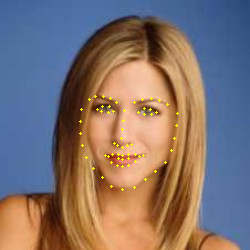

In [8]:
image = cv2.imread(f"{path}/images/{image_name}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for face_landmarks in face_landmarks_list:
      for facial_features in face_landmarks.values():
            for (x,y) in facial_features:
               cv2.circle(image, (x, y), 1, (255, 255, 0), -1)

image = Image.fromarray(image)
display(image)

### Identificação e recorte de múltiplos rostos na imagem

#### Para imagens que não estão tratadas, é possível reconhecer um ou mais rostos, e detectar os pontos onde estão localizadas as faces encontradas, e assim poder recortar a imagem

#### Realizando assim um tratamento da imagem, para podermos trabalhar somente com as informações necessárias
#### e eliminando o restante de informações inúteis na imagem

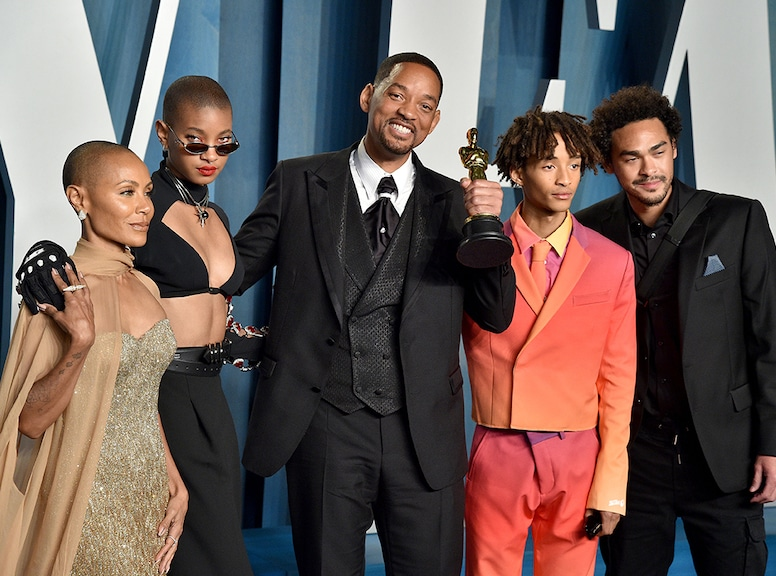

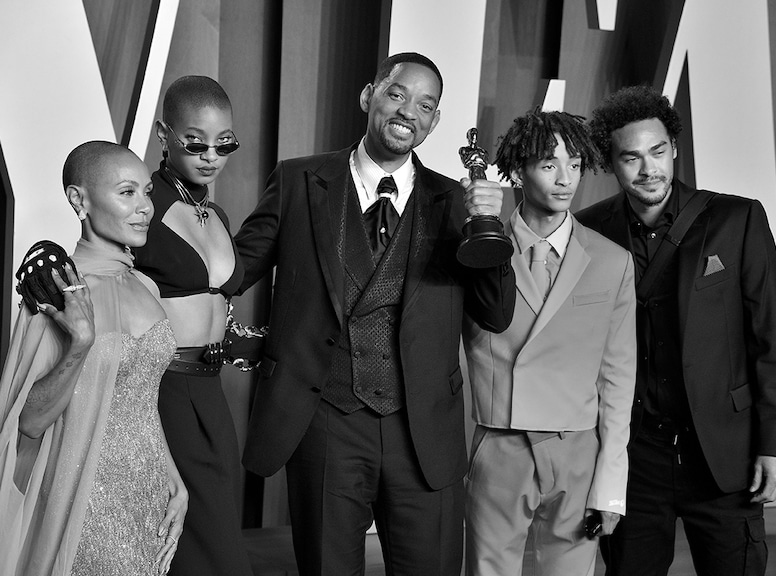

In [12]:
image_name = "family.jpg"
image = cv2.imread(f"{path}/images/{image_name}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image))
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
display(Image.fromarray(image_gray))

#### Realizando a detecção dos pixels onde existem rostos

In [10]:
face_locations = face_recognition.face_locations(image_gray, number_of_times_to_upsample=0, model="cnn")
print("-------------------------------------------------")
print("Rostos identificados: " + str(len(face_locations)))
print("-------------------------------------------------")

-------------------------------------------------
Rostos identificados: 5
-------------------------------------------------


#### Recortando e exibindo a localização dos rostos na imagem original colorida

Um rosto foi localizado nos pixels: Superior: 68, Esquerda: 364, Inferior: 147, Direita: 443


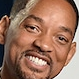

Um rosto foi localizado nos pixels: Superior: 164, Esquerda: 84, Inferior: 243, Direita: 163


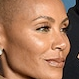

Um rosto foi localizado nos pixels: Superior: 132, Esquerda: 516, Inferior: 211, Direita: 595


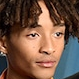

Um rosto foi localizado nos pixels: Superior: 124, Esquerda: 604, Inferior: 203, Direita: 683


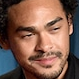

Um rosto foi localizado nos pixels: Superior: 108, Esquerda: 164, Inferior: 187, Direita: 243


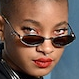

In [11]:
for face_location in face_locations:

    # Exibe a localização de cada rosto na imagem
    top, right, bottom, left = face_location
    print("Um rosto foi localizado nos pixels: Superior: {}, Esquerda: {}, Inferior: {}, Direita: {}".format(top, left, bottom, right))

    # Recorta a face na imagem
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    display(pil_image)